In [94]:
# Data manipulation
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize

# Dimensionality Reduction
# from openTSNE.sklearn import TSNE
import umap
from sklearn.decomposition import PCA, TruncatedSVD, KernelPCA
from sklearn.manifold import TSNE, Isomap
from mpl_toolkits.mplot3d import Axes3D

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, auc

# tqdm
from tqdm.auto import tqdm

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_05_visualization/wine.csv')
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [3]:
df.shape

(178, 14)

# –ó–∞–¥–∞–Ω–∏–µ 1

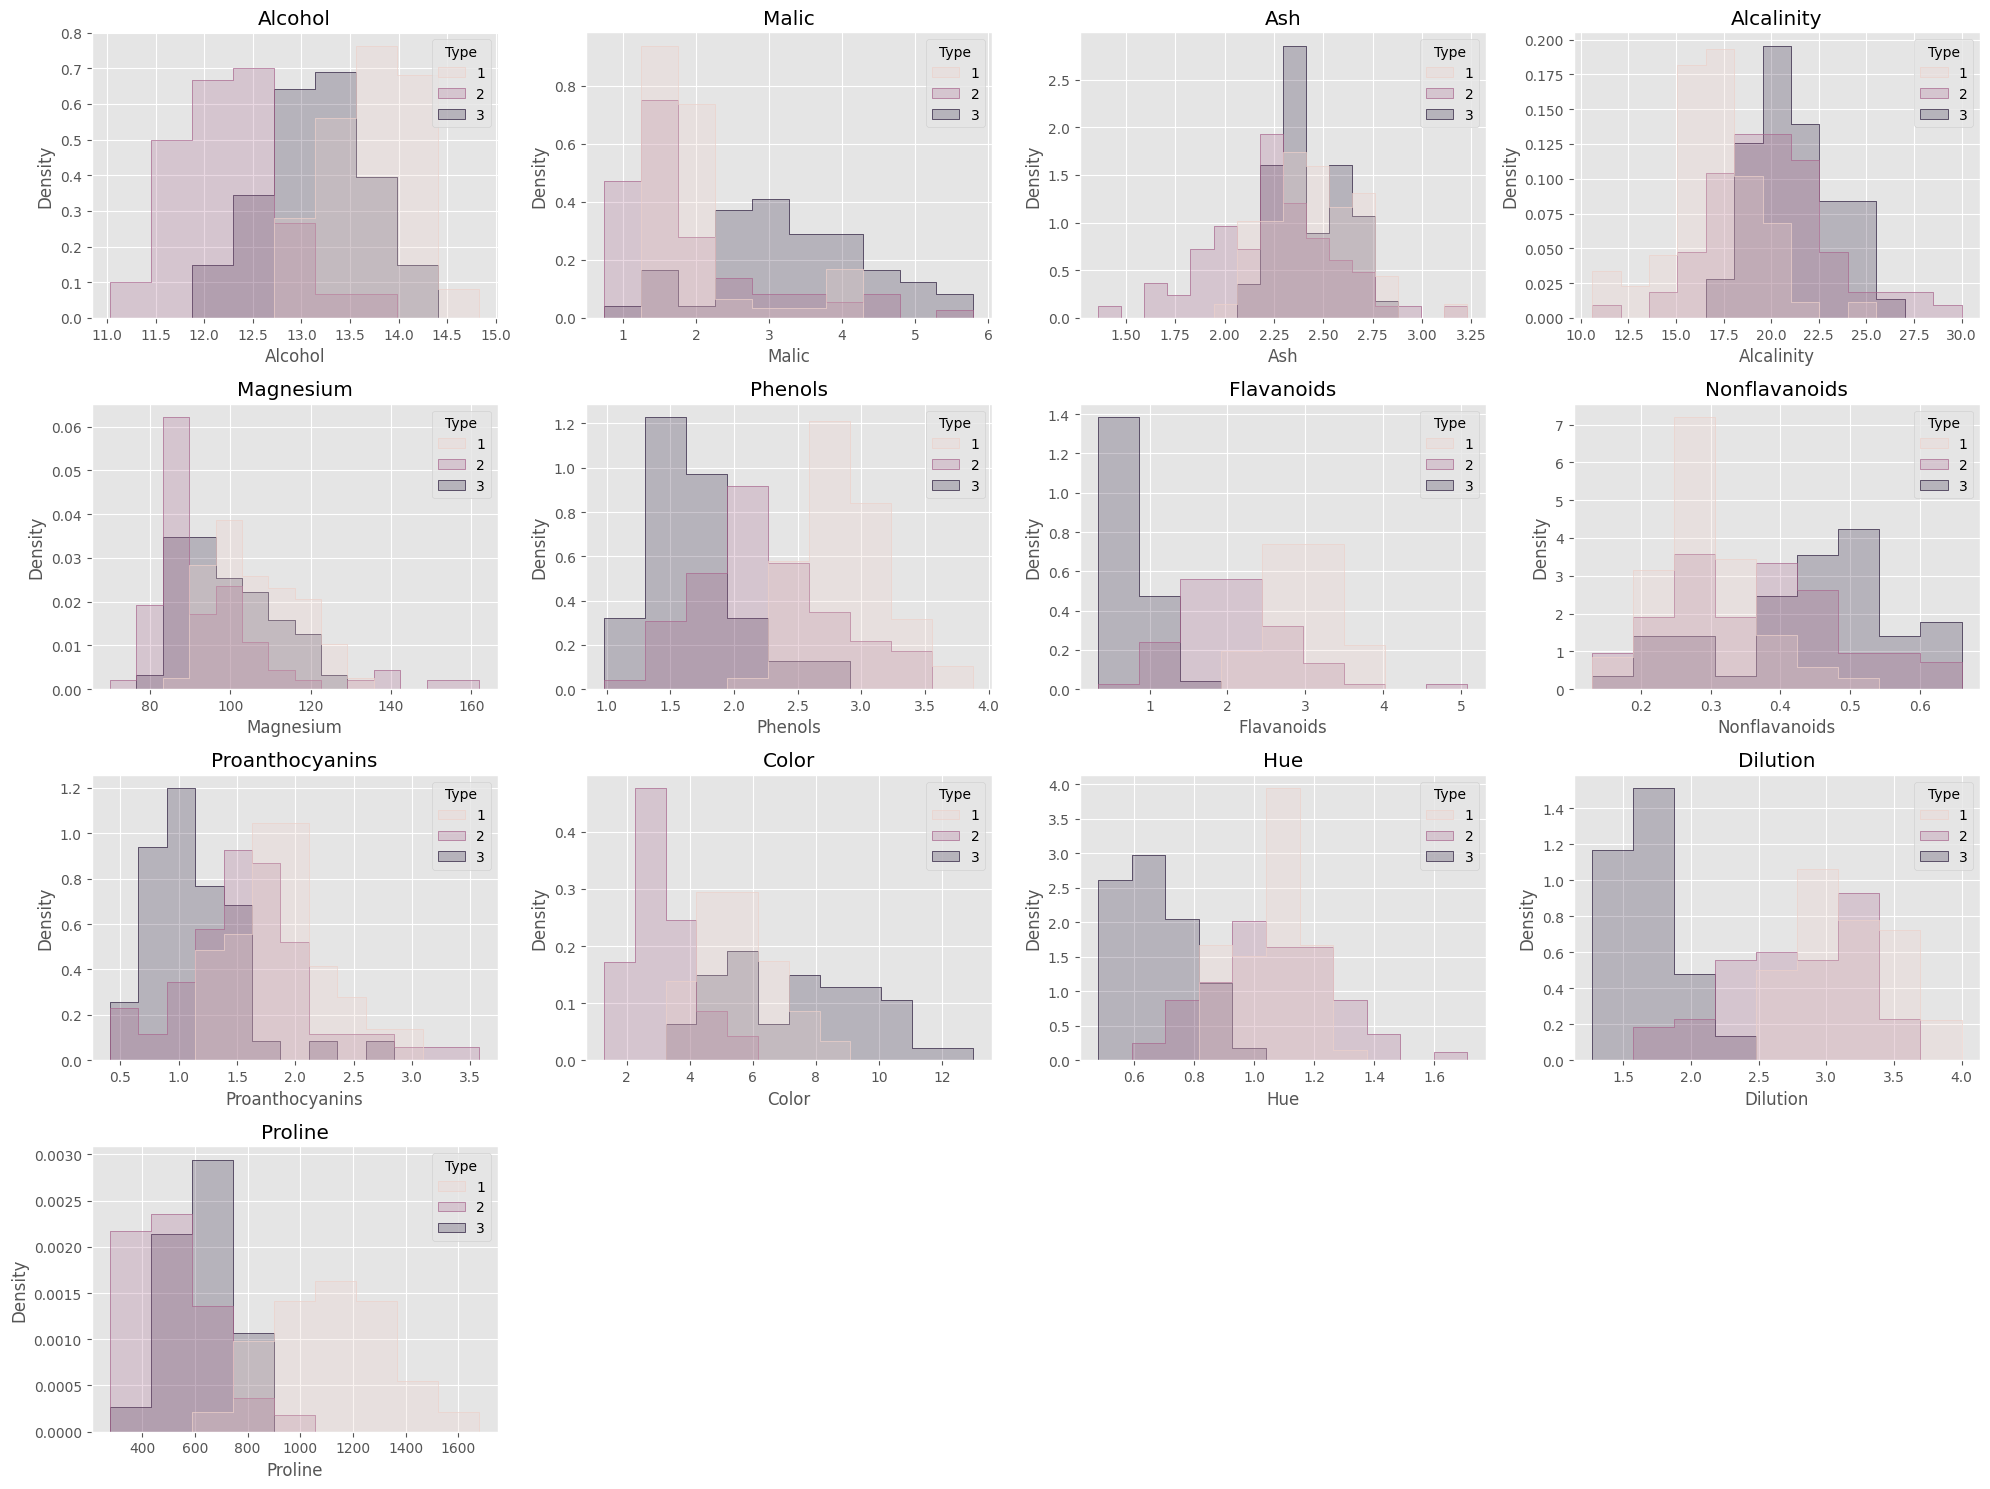

In [4]:
plt.figure(figsize=(20, 15))

# –°–æ–∑–¥–∞–Ω–∏–µ 13 –≥—Ä–∞—Ñ–∏–∫–æ–≤ –Ω–∞ –æ–¥–Ω–æ–º –ø–æ–ª–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º sns.displot –¥–ª—è –∫–∞–∂–¥–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏
for i, column in enumerate(df.columns[1:], start=1):
    plt.subplot(4, 4, i)  # –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—É–±–ø–ª–æ—Ç–æ–≤ –Ω–∞ 4 —Å—Ç—Ä–æ–∫–∏ –∏ 4 —Å—Ç–æ–ª–±—Ü–∞
    sns.histplot(data=df, x=column, hue='Type', element="step", stat="density", common_norm=False)
    plt.title(column)

plt.tight_layout()
plt.show()

## –í—ã–≤–æ–¥—ã

- **Alcohol**: –ï—Å—Ç—å –Ω–µ–±–æ–ª—å—à–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è –∞–ª–∫–æ–≥–æ–ª—è –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –≤–∏–Ω–∞. –í–∏–¥–Ω–æ, —á—Ç–æ `—Ç–∏–ø 1` —Å–∞–º—ã–π –∫—Ä–µ–ø–∫–∏–π, `—Ç–∏–ø 2` —Å–∞–º—ã–π –ª–∞–π—Ç–æ–≤—ã–π.
- **Malic Acid**: `—Ç–∏–ø 3` –∏–º–µ–µ—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–µ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∫–∏—Å–ª–æ—Ç—ã Malic.
- **Ash**: –í–æ-–ø–µ—Ä–≤—ã—Ö, `—Ç–∏–ø 2` –∏–º–µ–µ—Ç –±–æ–ª–µ–µ —à–∏—Ä–æ–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–æ—Å—Ç–∞–≤–∞ –∑–æ–ª—ã. –í–æ-–≤—Ç–æ—Ä—ã—Ö, –¥–ª—è `—Ç–∏–ø–∞ 3`, –Ω–∞–ø—Ä–æ—Ç–∏–≤ –∑–Ω–∞—á–µ–Ω–∏—è —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–∏–ª–∏—Å—å –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ –∑–Ω–∞—á–µ–Ω–∏–π –æ—Ç 2.24 –¥–æ 2.75.
- **Alcalinity**: –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π —â–µ–ª–æ—á–Ω–æ—Å—Ç–∏ –≤—Å–µ—Ö —Ç—Ä–µ—Ö —Ç–∏–ø–æ–≤ —Ç—è–≥–æ—Ç–µ–µ—Ç –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É, –æ–¥–Ω–∞–∫–æ –≤–∏–Ω–æ `—Ç–∏–ø–∞ 1` –º–µ–Ω–µ–µ —â–µ–ª–æ—á–Ω–æ–µ.
- **Magnesium**: –≤–∏–¥–∏–º –≤—ã—Å–æ–∫–∏–π –ø–∏–∫ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è –º–∞–≥–Ω–∏—è –¥–ª—è `—Ç–∏–ø–∞ 2` –≤ —Ä–∞–π–æ–Ω–µ –º–∏–Ω–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 80-90. –û–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ, —Ç–æ–ª—å–∫–æ —É `—Ç–∏–ø–∞ 2` –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤–∏–Ω–∞ —Å —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ–º –º–∞–≥–Ω–∏—è –≤—ã—à–µ 130 –∏ –¥–∞–∂–µ —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º 160.
- **Phenols**: –°—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–∏ —Ñ–µ–Ω–æ–ª–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ `—Ç–∏–ø–æ–º 1`, –∏–º–µ—é—â–∏–º –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è.
- **Flavanoids**: –û–¥–Ω–æ –∏–∑ —Å–∞–º—ã—Ö –∑–∞–º–µ—Ç–Ω—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π. –§–ª–∞–≤–∞–Ω–æ–∏–¥—ã –Ω–∞—Ö–æ–¥—è—Ç—Å—è –Ω–∞ –º–∏–Ω–∏–º—É–º–µ —É `—Ç–∏–ø–∞ 3`, –≤—ã—Å–æ–∫–æ–µ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —É `—Ç–∏–ø–∞ 1`
- **Nonflavanoids**: –†–∞–∑–ª–∏—á–∏—è –º–µ–Ω–µ–µ –≤—ã—Ä–∞–∂–µ–Ω—ã, –Ω–æ –æ–¥–∏–Ω `—Ç–∏–ø 1` –∏–º–µ–µ—Ç –º–µ–Ω—å—à–µ–µ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –Ω–µ—Ñ–ª–∞–≤–∞–Ω–æ–∏–¥–æ–≤.
- **Proanthocyanins**: –ù–∞–±–ª—é–¥–∞—é—Ç—Å—è —Ä–∞–∑–ª–∏—á–∏—è –≤ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–∏ –ø—Ä–æ–∞–Ω—Ç–æ—Ü–∏–∞–Ω–∏–¥–∏–Ω–æ–≤ –º–µ–∂–¥—É —Ç–∏–ø–∞–º–∏ –≤–∏–Ω. `—Ç–∏–ø 3` —Å–æ–¥–µ—Ä–∂–∏—Ç –ø—Ä–æ–∞–Ω—Ç–æ—Ü–∏–∞–Ω–∏–¥–∏–Ω–æ–≤ –º–µ–Ω—å—à–µ –¥—Ä—É–≥–∏—Ö.
- **Color**: –ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ —Ü–≤–µ—Ç–µ –≤–∏–Ω. `—Ç–∏–ø–∞ 3` –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ —Ü–≤–µ—Ç–∞ –≤—ã—à–µ, `—Ç–∏–ø 2` –Ω–∏–∂–µ –¥—Ä—É–≥–∏—Ö.
- **Hue**: –ï—Å—Ç—å –∑–∞–º–µ—Ç–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –≤ –æ—Ç—Ç–µ–Ω–∫–µ –≤–∏–Ω, —É `—Ç–∏–ø–∞ 3` –æ—Ç—Ç–µ–Ω–æ–∫ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ 0.2 - 0.8. –î–ª—è –≤—Ç–æ—Ä–æ–≥–æ —Ç–∏–ø–∞ –∑–Ω–∞—á–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–ª–∏–ª–∏—Å—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ.
- **Dilution**: –†–∞–∑–ª–∏—á–∏—è –≤ —Ä–∞–∑–±–∞–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ –≤–∏–Ω –≤–∏–¥–Ω—ã, `—Ç–∏–ø 1` –∏–º–µ–µ—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫—É—é —Å—Ç–µ–ø–µ–Ω—å —Ä–∞–∑–±–∞–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏. `—Ç–∏–ø 3` —Å–∞–º—ã–π –Ω–µ—Ä–∞–∑–±–∞–≤–ª–µ–Ω–Ω—ã–π.
- **Proline**: –û–¥–Ω–æ –∏–∑ —Å–∞–º—ã—Ö —è—Ä–∫–∏—Ö —Ä–∞–∑–ª–∏—á–∏–π, —Å `—Ç–∏–ø–æ–º 1`, –∏–º–µ—é—â–∏–º –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–æ–µ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –ø—Ä–æ–ª–∏–Ω–∞.

# –ó–∞–¥–∞–Ω–∏–µ 2

In [8]:
corr_matrix = df.corr()
top_correlations = corr_matrix['Type'].abs().sort_values(ascending=False)[1:4]

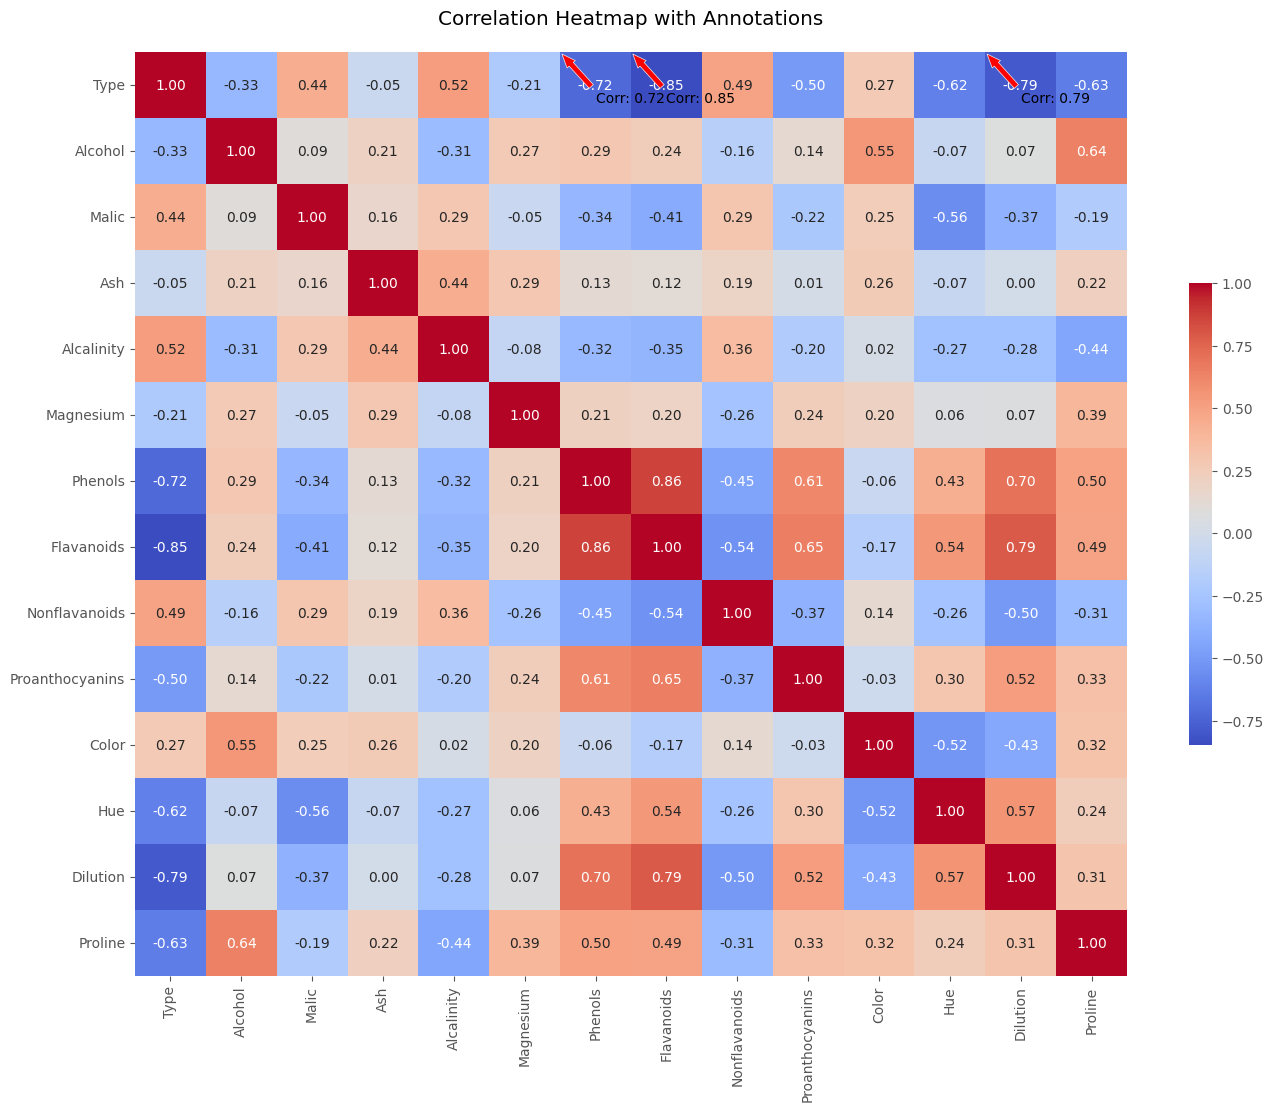

In [10]:
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})
arrowprops = dict(facecolor='red', shrink=0.05, headwidth=8, headlength=10)
plt.title('Correlation Heatmap with Annotations', pad=20)  # –æ—Ç—Å—Ç—É–ø

# –∞–Ω–Ω–æ—Ç–∞—Ü–∏–∏
for feature, value in top_correlations.items():
    selected_x = df.columns.get_loc(feature)  # X
    selected_y = 0  # Y 
    text_x = selected_x + 0.5
    text_y = selected_y + 0.7
    
    plt.annotate(f'Corr: {value:.2f}',
                 xy=(selected_x, selected_y), xycoords='data',
                 xytext=(text_x, text_y), textcoords='data',
                 arrowprops=arrowprops, ha='left', va='center')

plt.show()

In [11]:
top_correlations

Flavanoids    0.847498
Dilution      0.788230
Phenols       0.719163
Name: Type, dtype: float64

# –ó–∞–¥–∞–Ω–∏–µ 3

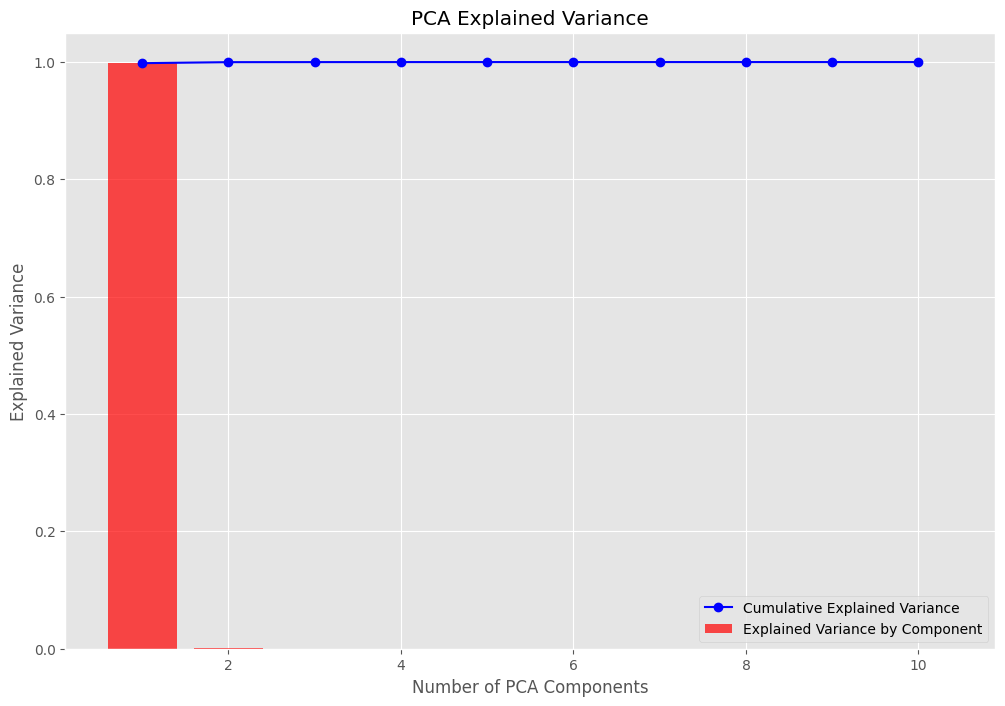

In [12]:
from sklearn.decomposition import PCA
import numpy as np

X = df.drop('Type', axis=1)
y = df['Type']

explained_variances = []
cumulative_variances = []
for n in range(1, 11):
    pca = PCA(n_components=n)
    pca.fit(X)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))
    cumulative_variances.append(pca.explained_variance_ratio_)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), explained_variances, marker='o', linestyle='-', color='b', label='Cumulative Explained Variance')
plt.bar(range(1, 11), [cumulative_variances[i][-1] for i in range(10)], color='r', alpha=0.7, label='Explained Variance by Component')

plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.show()

–ì–¥–µ-—Ç–æ –æ—à–∏–±–∫–∞, –∞ –≥–¥–µ –Ω–µ –∑–Ω–∞—é

# –ó–∞–¥–∞–Ω–∏–µ 4

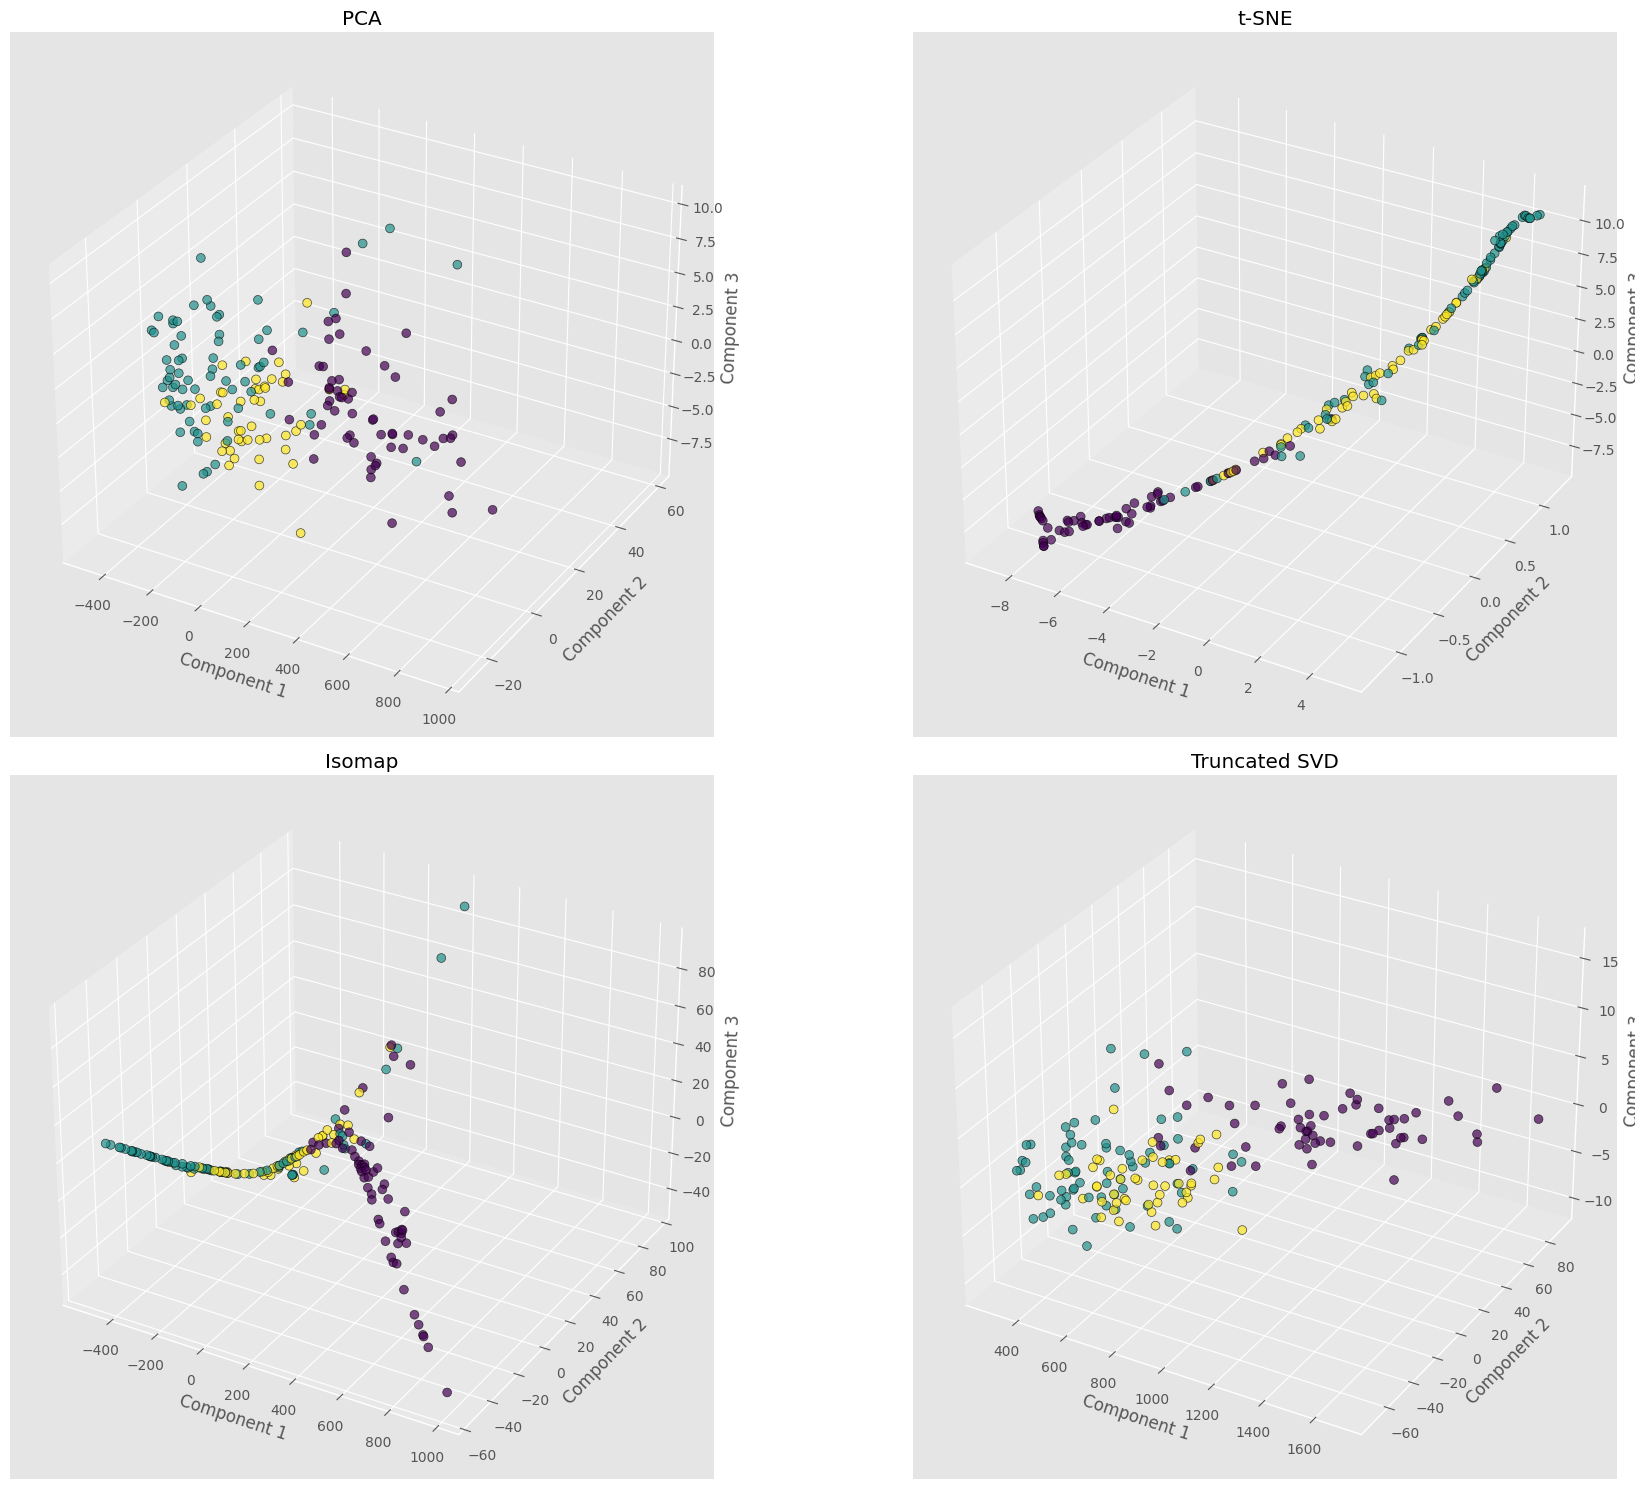

In [13]:
algorithms = {
    'PCA': PCA(n_components=3),
    't-SNE': TSNE(n_components=3, learning_rate='auto', init='random'),
    'Isomap': Isomap(n_components=3),
    'Truncated SVD': TruncatedSVD(n_components=3)
}

fig = plt.figure(figsize=(20, 15))

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ –∏ –æ—Ç—Ä–∏—Å–æ–≤–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
for i, (name, algorithm) in enumerate(algorithms.items(), start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    transformed = algorithm.fit_transform(X)
    
    ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], c=y, cmap='viridis', edgecolor='k', s=40, alpha=0.7)
    ax.set_title(name)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")

plt.tight_layout()
plt.show()

## –í—ã–≤–æ–¥—ã

**PCA** : –ö–ª–∞—Å—Ç–µ—Ä—ã –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞–∑–¥–µ–ª—è—é—Ç—Å—è, –Ω–æ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è. PCA —á–∞—Å—Ç–æ —Ä–∞–±–æ—Ç–∞–µ—Ç —Ö–æ—Ä–æ—à–æ, –∫–æ–≥–¥–∞ –ª–∏–Ω–µ–π–Ω—ã–µ –æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å–∏–ª—å–Ω—ã, –Ω–æ –æ–Ω –Ω–µ –≤—Å–µ–≥–¥–∞ –ª—É—á—à–µ –≤—Å–µ–≥–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–º–∏ —Å—Ç—Ä—É–∫—Ç—É—Ä–∞–º–∏.<br>
**t-SNE**: –í —ç—Ç–æ–º —Å–ª—É—á–∞–µ –∫–ª–∞—Å—Ç–µ—Ä—ã –∫–∞–∂—É—Ç—Å—è —Ö–æ—Ä–æ—à–æ —Ä–∞–∑–¥–µ–ª–µ–Ω–Ω—ã–º–∏ –∏ –¥–∞–∂–µ —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –≤ –≤–∏–¥–µ —Ü–µ–ø–æ—á–∫–∏, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ç–æ, —á—Ç–æ t-SNE —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å –Ω–µ–ª–∏–Ω–µ–π–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä–æ–π –¥–∞–Ω–Ω—ã—Ö –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –æ—Ç—Ä–∞–∂–∞–µ—Ç –ª–æ–∫–∞–ª—å–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞–Ω–Ω—ã—Ö.<br>
**Isomap** : –ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ Isomap –≤–∏–¥–Ω–æ, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ –≤–∏–¥–µ –∫—Ä–∏–≤–æ–π –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ —Å –º–µ–Ω—å—à–∏–º –ø–µ—Ä–µ–∫—Ä—ã—Ç–∏–µ–º –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏, —á–µ–º PCA, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ–π —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –≤ –¥–∞–Ω–Ω—ã—Ö, —Å –∫–æ—Ç–æ—Ä–æ–π Isomap —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è –ª—É—á—à–µ, —á–µ–º PCA.<br>
**Truncated SVD** : –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å—Ö–æ–∂–∏ —Å PCA, –Ω–æ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –∫–ª–∞—Å—Ç–µ—Ä—ã –Ω–µ–º–Ω–æ–≥–æ –±–æ–ª–µ–µ —Ä–∞–∑–¥–µ–ª—å–Ω—ã. Truncated SVD —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Å —Ä–∞–∑—Ä–µ–∂–µ–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –∏, –ø–æ—Ö–æ–∂–µ, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã PCA –¥–ª—è —ç—Ç–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö.<br>
<br>
–ò—Å—Ö–æ–¥—è –∏–∑ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤, –º–æ–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ t-SNE –∏–º–µ–µ—Ç –Ω–∞–∏–±–æ–ª–µ–µ —á–µ—Ç–∫–æ–µ –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ. –¥–ª—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ –æ–Ω –ø–æ–¥—Ö–æ–¥–∏—Ç –ª—É—á—à–µ –¥—Ä—É–≥–∏—Ö, –æ—Å–æ–±–µ–Ω–Ω–æ –∫–æ–≥–¥–∞ –≤–∞–∂–Ω–æ —Ä–∞—Å–∫—Ä—ã—Ç–∏–µ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã—Ö —Å—Ç—Ä—É–∫—Ç—É—Ä –¥–∞–Ω–Ω—ã—Ö. –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–æ–π –º–æ–∂–µ—Ç –±—ã—Ç—å **Isomap**, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ö–æ—Ä–æ—à–µ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤, –∏ –Ω–æ –º–µ–Ω–µ–µ —Ç—Ä–µ–±–æ–≤–∞—Ç–µ–ª–µ–Ω –∫ —Ä–µ—Å—É—Ä—Å–∞–º.

# –ó–∞–¥–∞–Ω–∏–µ 5

In [68]:
X = df.drop('Type', axis=1)
y = df['Type']
y = y -1 # –¥–ª—è –∫–ª–∞—Å—Å–æ–≤ —Å 0

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
pca = PCA(n_components=2)
kpca = KernelPCA(n_components=2, kernel='rbf') # —Ä–µ—à–∏–ª –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ
tsne = TSNE(n_components=2, random_state=42)
isomap = Isomap(n_components=2)

In [72]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_train_kpca = kpca.fit_transform(X_train_scaled)
X_test_kpca = kpca.transform(X_test_scaled)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_train_isomap = isomap.fit_transform(X_train_scaled)
X_test_isomap = isomap.transform(X_test_scaled)

In [73]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    "CatBoost": CatBoostClassifier(),
    "LGBM": LGBMClassifier(),
    "XGB": XGBClassifier()
}

In [74]:
def evaluate_classifiers(X_train, X_test, y_train, y_test, classifiers):
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        acc_test = accuracy_score(y_test, y_pred_test)
        results[name] = acc_test
    return results

In [ ]:
results_isomap = evaluate_classifiers(X_train_isomap, X_test_isomap, y_train, y_test, classifiers)
results_original = evaluate_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, classifiers)

In [81]:
results_df = pd.DataFrame([results_original, results_isomap], index=['Original', 'Isomap'])

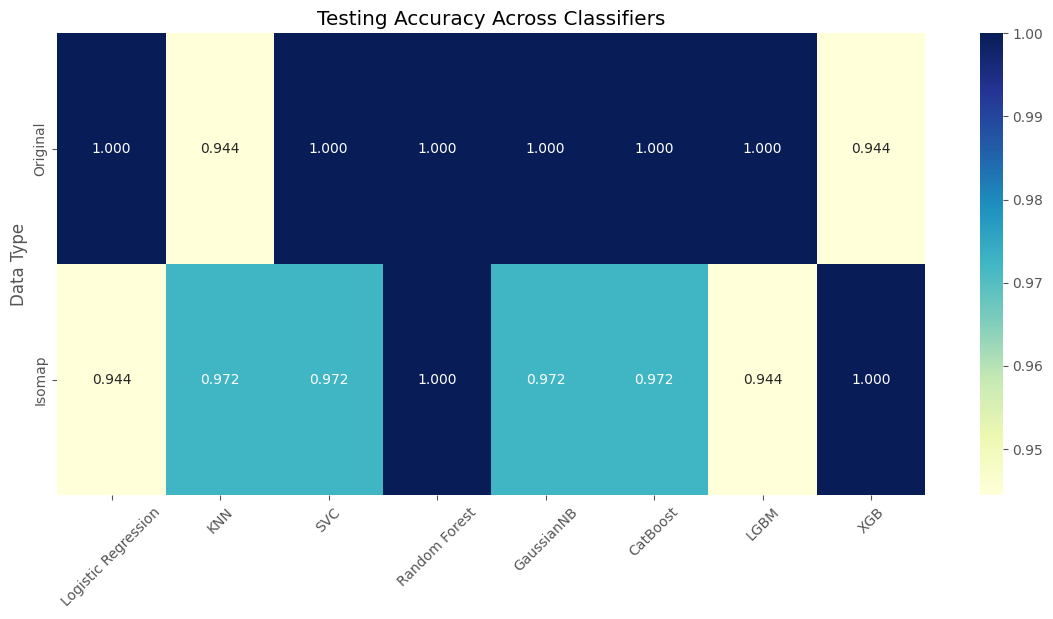

In [82]:
plt.figure(figsize=(14, 6))
sns.heatmap(results_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Testing Accuracy Across Classifiers')
plt.ylabel('Data Type')
plt.xticks(rotation=45)
plt.show()

–¢–æ–∂–µ –≥–¥–µ-—Ç–æ –æ—à–∏–±–∫–∞,—Ç.–∫. —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–ª—É—á–∏–ª–∏—Å—å —Å—Ç—Ä–∞–Ω–Ω—ã–µ

# –ó–∞–¥–∞–Ω–∏–µ 6

In [99]:
best_classifier = CatBoostClassifier()

In [ ]:
best_classifier.fit(X_train_scaled, y_train)

In [101]:
y_pred = best_classifier.predict(X_test_scaled)
y_pred_proba = best_classifier.predict_proba(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



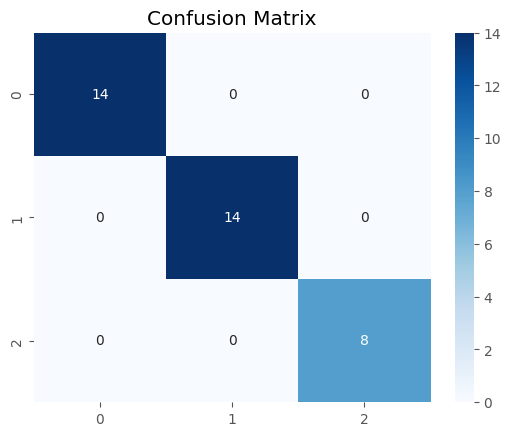

In [102]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [103]:
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]

In [104]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

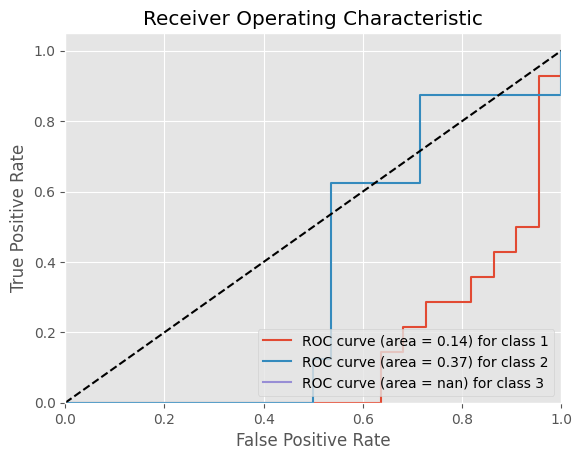

In [105]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i+1}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

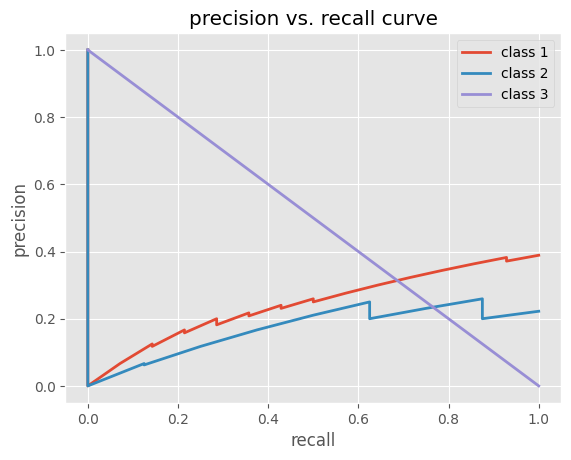

In [106]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'class {i+1}')
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# –ù—É —ç—Ç–æ –∫–∞–∫–æ–π-—Ç–æ –±—Ä–µ–¥ –ø–æ–ª—É—á–∏–ª—Å—è, –≤ —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏ —Å–æ–≥–ª–∞—Å–µ–Ω –Ω–∞ 0 –±–∞–ª–ª–æ–≤ ü§∑‚Äç‚ôÇÔ∏è